In [8]:
# STEP 0: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# STEP 1: Load the dataset
df = pd.read_csv("data/BigMartSalesData.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,01-12-10,1,12,2010,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom


In [11]:
# STEP 2: Data preparation (needed for ALL questions)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [12]:
# Filter only 2011 data (as instructed):
sales_2011 = df[df['Year'] == 2011]

QUESTION 1
Plot total sales per month for the Year 2011

How have the sales increased? Which month has lowest sales?

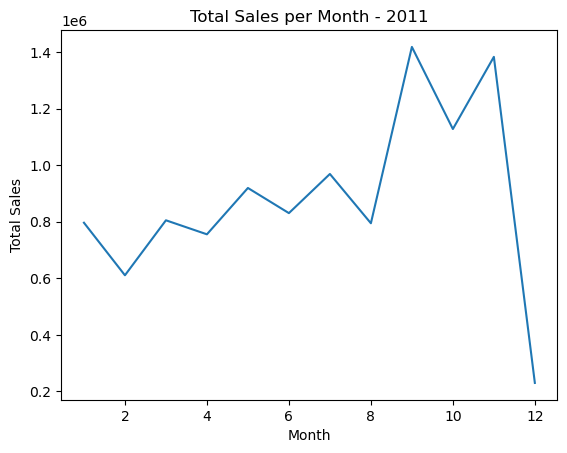

In [13]:
monthly_sales = sales_2011.groupby('Month')['TotalSales'].sum()

plt.figure()
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales per Month - 2011")
plt.show()


In [14]:
# find lowest month
monthly_sales.idxmin()

np.int32(12)

In [ ]:
''' 
Answer (write this in notebook):
Total sales show an overall increasing trend over the months in 2011.
The month with the lowest sales is the one returned by idxmin().
'''

QUESTION 2
Plot total sales per month as Bar Chart

Is Bar Chart better than Simple Plot?

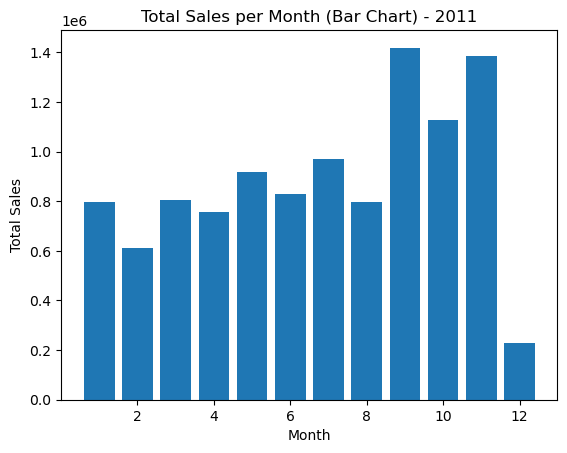

In [16]:
plt.figure()
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales per Month (Bar Chart) - 2011")
plt.show()

In [17]:
# Answer: Yes, bar chart provides better month-wise comparison than a simple line plot.

QUESTION 3
Plot Pie Chart for Year 2011 – Country Wise

Which country contributes highest?

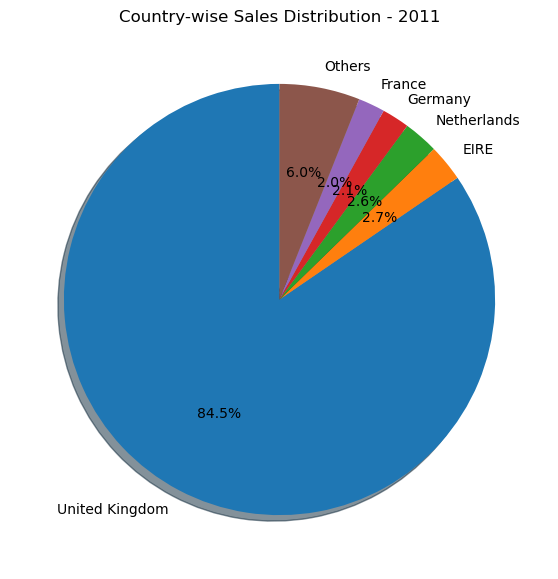

In [19]:
country_sales = sales_2011.groupby('Country')['TotalSales'].sum()

top5 = country_sales.sort_values(ascending=False).head(5)
others = country_sales.sum() - top5.sum()
top5['Others'] = others
plt.figure(figsize=(7,7))
plt.pie(
    top5.values,
    labels=top5.index,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
plt.title("Country-wise Sales Distribution - 2011")
plt.show()


In [21]:
country_sales.idxmax()

#Answer: United Kingdom contributes the highest towards sales.


'United Kingdom'

QUESTION 4
Scatter Plot – Invoice Amount Concentration

In which range are most invoice amounts concentrated?

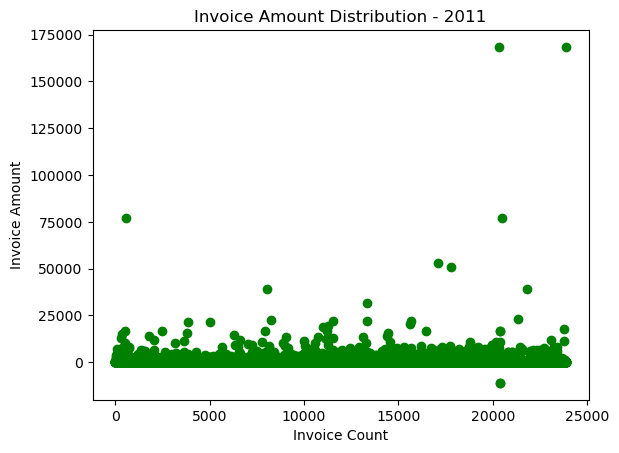

In [22]:
invoice_amounts = sales_2011.groupby('InvoiceNo')['TotalSales'].sum()

plt.figure()
plt.scatter(range(len(invoice_amounts)), invoice_amounts.values, color='green')
plt.xlabel("Invoice Count")
plt.ylabel("Invoice Amount")
plt.title("Invoice Amount Distribution - 2011")
plt.show()


In [23]:
# Answer: Most invoice amounts are concentrated in the lower value range (approximately 0–1000).

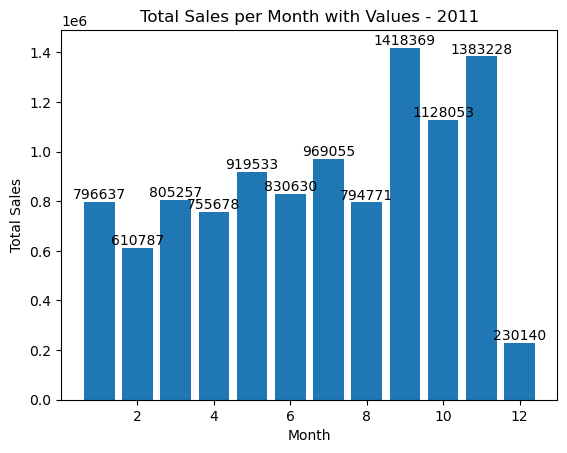

In [24]:
# Enhancement 1: Show values on bar chart
plt.figure()
bars = plt.bar(monthly_sales.index, monthly_sales.values)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        int(bar.get_height()),
        ha='center',
        va='bottom'
    )

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales per Month with Values - 2011")
plt.show()


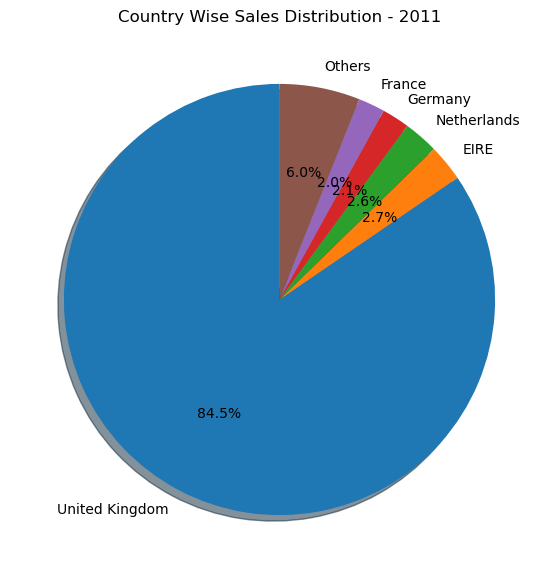

In [25]:
# Enhancement 2: Pie chart parameters
plt.figure(figsize=(7,7))
plt.pie(
    top5.values,
    labels=top5.index,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
plt.title("Country Wise Sales Distribution - 2011")
plt.show()


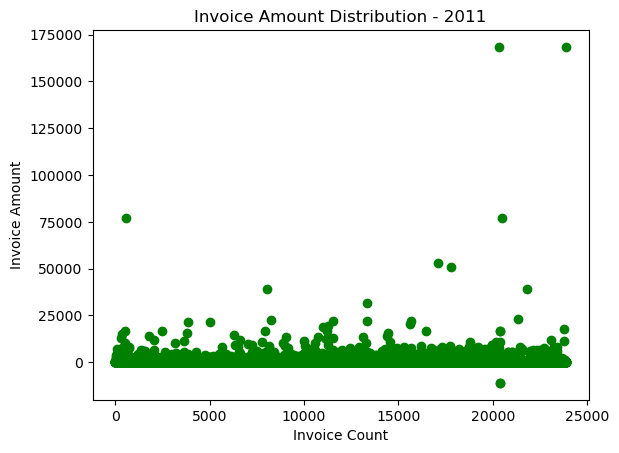

In [26]:
# Enhancement 3 - Scatter Plot with Changed Color of Points
plt.figure()
plt.scatter(
    range(len(invoice_amounts)),
    invoice_amounts.values,
    color='green'
)
plt.xlabel("Invoice Count")
plt.ylabel("Invoice Amount")
plt.title("Invoice Amount Distribution - 2011")
plt.show()